## Using NumPy with ArcGIS: *FeatureClass to NumPy Arrays*

This notebook demonstrates how NumPy facilitates manipulation of feature class attribute data. By no means is this an in-depth introduction, let alone discussion, of NumPy, but it does at least familiarize you with what NumPy is about and how it can be used with ArcGIS feature classes. The links below provide more in-depth reading on NumPy and how it's used with feature classes.

Resources:
* https://jakevdp.github.io/PythonDataScienceHandbook/index.html#2.-Introduction-to-NumPy
* http://pro.arcgis.com/en/pro-app/arcpy/data-access/featureclasstonumpyarray.htm

In [1]:
#Import arcpy and numpy
import arcpy
import numpy as np

In [2]:
#Point to the HUC12.shp feature class in the Data folder (ensure it exists)
huc12_fc = '../Data/HUC12.shp'
print (arcpy.Exists(huc12_fc))

True


In [5]:
#List the fields contained in the "huc12_fc" feature class
[f.name for f in arcpy.ListFields(huc12_fc)]

['FID',
 'Shape',
 'OBJECTID_2',
 'OBJECTID',
 'HUC_8',
 'HUC_10',
 'HUC_12',
 'ACRES',
 'NCONTRB_A',
 'HU_10_GNIS',
 'HU_12_GNIS',
 'HU_10_DS',
 'HU_10_NAME',
 'HU_10_MOD',
 'HU_10_TYPE',
 'HU_12_DS',
 'HU_12_NAME',
 'HU_12_MOD',
 'HU_12_TYPE',
 'META_ID',
 'STATES',
 'GlobalID',
 'SHAPE_Leng',
 'GAZ_ID',
 'WBD_Date',
 'VPUID',
 'Shape_Le_1',
 'Shape_STAr',
 'Shape_STLe']

* Here,we convert the feature class to a NumPy array using ArcPy's [`FeatureClassToNumPyArray`](http://pro.arcgis.com/en/pro-app/arcpy/data-access/featureclasstonumpyarray.htm) function. 

In [6]:
#List the fields we want to convert
fieldList = ["Shape@XY","HUC_8","HUC_12","ACRES"]
arrHUCS = arcpy.da.FeatureClassToNumPyArray(huc12_fc,fieldList)

In [7]:
#Display the type of the returned object
type(arrHUCS)

numpy.ndarray

* As a NumPy array, we can do different operations on the feature class. But first, let's inspect the array's properties. 

In [8]:
#Reveal documentation on the ndarray object
arrHUCS?

In [12]:
arrHUCS.shape

(210,)

In [13]:
#How many records does it contain
arrHUCS.size

210

In [14]:
#What are the data types stored in this array
print (arrHUCS.dtype)

[('Shape@XY', '<f8', (2,)), ('HUC_8', '<U8'), ('HUC_12', '<U12'), ('ACRES', '<f8')]


In [15]:
#Or, just what are the names of the "columns"
print (arrHUCS.dtype.names)

('Shape@XY', 'HUC_8', 'HUC_12', 'ACRES')


In looking at the data types, you notice that this NumPy array actually has multiple data types.


The ndarray object is actually a specific type of NumPy array - a **structured array**. (See https://jakevdp.github.io/PythonDataScienceHandbook/02.09-structured-data-numpy.html) A *structured array* is really just a collection of individual ndarrays, all of the same length, with each individual ndarray referenced by a field name. In other words, it's structured much like an attribute table where each field/column is it's own ndarray. 

Our `arrHUCs` structured array has 4 embedded "sub" arrays with the names `SHAPE@XY`, `HUC_8`, `HUC_12`, and `ACRES`)

Now, let's see what we can do with this...

### Selecting specific rows/columns/values from our NumPy array
* Numpy arrays allow **slicing**, much like familiar Python lists, enabling us to quickly nab subsets of data. 

In [16]:
#Show the first row of data
print (arrHUCS[0]) 

([-79.93890576,  35.48508838], '03040103', '030401030503', 15414.)


In [17]:
#Show all data from the first 5 rows of data
print (arrHUCS[0:5])     

[([-79.93890576,  35.48508838], '03040103', '030401030503', 15414.)
 ([-80.10361823,  35.47440895], '03040103', '030401030605', 42390.)
 ([-80.39449973,  35.87133309], '03040101', '030401011503', 32998.)
 ([-80.50179609,  35.89937972], '03040101', '030401011404', 29297.)
 ([-80.35986875,  34.82920682], '03040104', '030401040101', 14822.)]


In [18]:
#YOU TRY IT: Show all data from rows 10 thru 15
print(arrHUCS[9:14])

[([-80.74349003,  36.55573167], '03040101', '030401010804', 10389.0986449 )
 ([-80.76993095,  36.4982624 ], '03040101', '030401010703',  1165.65651233)
 ([-80.87183301,  36.51863643], '03040101', '030401010701',   886.50610243)
 ([-80.49255072,  35.2641331 ], '03040105', '030401050307', 33634.        )
 ([-79.79444406,  35.15382153], '03040104', '030401040505', 32563.        )]


In [19]:
#Show the value of the 5th row in the `HUC_8' field
arrHUCS[4]['HUC_8']

'03040104'

In [20]:
#YOU TRY IT: Show the value in the ACRES field of the last row
arrHUCS[-1]['ACRES']

10563.0

In [21]:
#List all the HUC12s in the dataset
print (arrHUCS['HUC_12'])

['030401030503' '030401030605' '030401011503' '030401011404'
 '030401040101' '030401050602' '030401050603' '030401040102'
 '030401010802' '030401010804' '030401010703' '030401010701'
 '030401050307' '030401040505' '030401040402' '030401040401'
 '030401050305' '030401050405' '030401050403' '030401040204'
 '030401040202' '030401050304' '030401040306' '030401040305'
 '030401050105' '030401050401' '030401040201' '030401050201'
 '030401050404' '030401050402' '030401030505' '030401050203'
 '030401040303' '030401050303' '030401010603' '030401010303'
 '030401010304' '030401010306' '030401010403' '030401011302'
 '030401011001' '030401011002' '030401011005' '030401011006'
 '030401010904' '030401011004' '030401010104' '030401010202'
 '030401050702' '030401050306' '030401050601' '030401050502'
 '030401050501' '030401050504' '030401050503' '030401050506'
 '030401050701' '030401050704' '030401040301' '030401030105'
 '030401020504' '030401030601' '030401020304' '030401030207'
 '030401020402' '0304010

In [22]:
#YOU TRY IT: #List all the ACRES values in the dataset
print (arrHUCS['ACRES'])

[15414.         42390.         32998.         29297.
 14822.         21083.         11745.         26054.
 10907.619446   10389.0986449   1165.65651233   886.50610243
 33634.         32563.         27580.         20719.
 12768.         25867.          8008.         21240.
 11358.         23836.         31951.         18792.
 20165.         18520.         20796.          8818.
 35647.         21391.         20265.         29616.
 22263.         39307.          8217.         19168.
 18277.         31521.         14750.         22398.
 27157.         14810.         18870.         24683.
 17454.          9358.         32340.         24223.
 32153.         15766.         21601.          9366.
  9742.         38941.         22616.         25016.
 27058.         25726.         29255.         23405.
 17173.         21942.          7699.         16009.
 19311.         20836.         16998.         14560.
 25516.         14636.         31161.         18661.
 18061.         17485.         16059. 

### Calculations
* We can also do rapid calculations with the data...

In [23]:
#List the mean area of all HUCs
arrHUCS['ACRES'].mean()

20493.65411175457

In [24]:
#List all the ACRES values, but in hectares (1 acre = 2.47105 ha)
arrHUCS['ACRES'] * 2.47105

array([ 38088.7647    , 104747.8095    ,  81539.7079    ,  72394.35185   ,
        36625.9031    ,  52097.14715   ,  29022.48225   ,  64380.7367    ,
        26953.27303204,  25671.98220648,   2880.39552479,   2190.60090441,
        83111.2957    ,  80464.80115   ,  68151.559     ,  51197.68495   ,
        31550.3664    ,  63918.65035   ,  19788.1684    ,  52485.102     ,
        28066.1859    ,  58899.9478    ,  78952.51855   ,  46435.9716    ,
        49828.72325   ,  45763.846     ,  51387.9558    ,  21789.7189    ,
        88085.51935   ,  52858.23055   ,  50075.82825   ,  73182.6168    ,
        55012.98615   ,  97129.56235   ,  20304.61785   ,  47365.0864    ,
        45163.38085   ,  77889.96705   ,  36447.9875    ,  55346.5779    ,
        67106.30485   ,  36596.2505    ,  46628.7135    ,  60992.92715   ,
        43129.7067    ,  23124.0859    ,  79913.757     ,  59856.24415   ,
        79451.67065   ,  38958.5743    ,  53377.15105   ,  23143.8543    ,
        24072.9691    ,  

In [26]:
#YOU TRY IT: What is the total area of all HUC12s, in hectares
arrHUCS['ACRES'].sum()

4303667.36346846

### Subsetting data with NumPy
We can also subset records in our array which we will do as a two step process. 
1. First we create a boolean **mask array**, that is an array of true and false values where a record is true if a condition is met. 
2. Then we **apply this mask** to our original array to isolate records where the mask is true

In [27]:
#First we make a boolean mask and show the first 10 records
arrMask = (arrHUCS["HUC_8"] == '03040103')
arrMask[:10]

array([ True,  True, False, False, False, False, False, False, False,
       False])

In [28]:
#Now we apply the mask to isolate record where this is true
arrSelectedHUC8 = arrHUCS[arrMask]

In [29]:
#The original array had 201 records, how many records does this have? 
print (arrSelectedHUC8.size)

33


In [30]:
#Print the 11th row of our selected records
arrSelectedHUC8[10]

([-80.21336519,  35.79472106], '03040103', '030401030206', 19941.)

In [31]:
#Calculate the mean area of these HUCs
arrSelectedHUC8['ACRES'].mean()

23075.121212121212

In [32]:
#Plot a historam of HUC_12 areas
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()  # set plot style

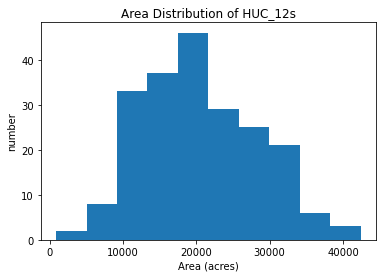

In [33]:
plt.hist(arrHUCS['ACRES']);
plt.title('Area Distribution of HUC_12s')
plt.xlabel('Area (acres)')
plt.ylabel('number');

### Recap
Converting our feature attribute table to a NumPy array opens the door to some rapid computations using NumPy's speedy capabilities - a vast improvment over using arcpy's cursor objects!